Assignment 1.1: NLP Preprocessing: News Classification

Mostafa Zamaniturk

Instructions
For this assignment, you will use the indicated dataset and implement the tasks described below in your Jupyter Notebook or Python script. You will submit your notebook or script as a PDF (preferred) or HTML document. 

Required Dataset
BBC News Classification Dataset (Kaggle) or sklearn.datasets.fetch_20newsgroups

5 categories: Business, Entertainment, Politics, Sport, Tech
~2,225 news articles

Required Details

Part 1: Data Exploration

- Load the dataset and show basic statistics

- Visualize article distribution by category

- Display sample articles from each category


Dataset Shape: (1490, 3)

Columns: ['ArticleId', 'Text', 'Category']

Category Counts:
 Category
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB
None

Basic Statistics (text length):
count     1490.000000
mean      2233.461745
std       1205.153358
min        501.000000
25%       1453.000000
50%       1961.000000
75%       2751.250000
max      18387.000000
Name: text_length, dtype: float64


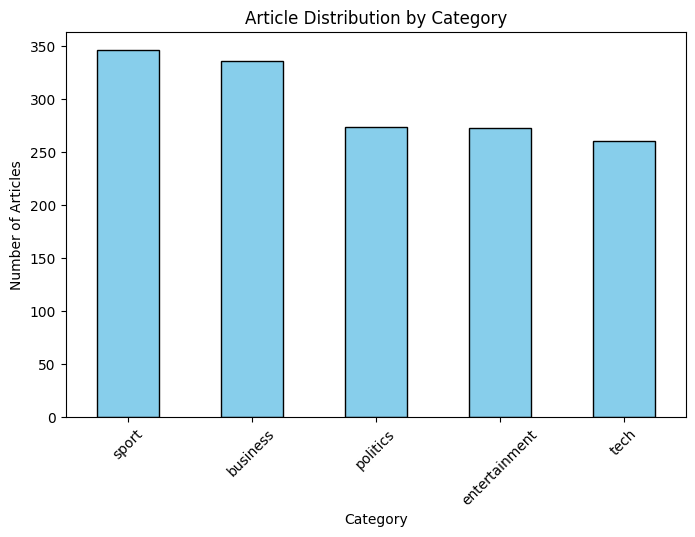

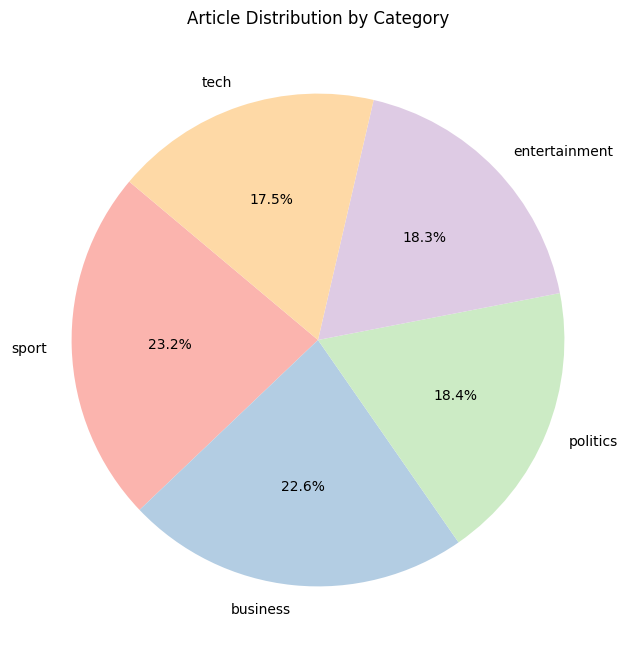

Category: business
Sample text:

nasdaq planning $100m share sale the owner of the technology-dominated nasdaq stock index plans to sell shares to the public and list itself on the market it operates.  according to a registration document filed with the securities and exchange commission  nasdaq stock market plans to raise $100m (£52m) from the sale. some observers see this as another step closer to a full public listing. however nasdaq  an icon of the 1990s technology boom  recently poured cold water on those suggestions.  the ...
Category: tech
Sample text:

reboot ordered for eu patent law a european parliament committee has ordered a rewrite of the proposals for controversial new european union rules which govern computer-based inventions.  the legal affairs committee (juri) said the commission should re-submit the computer implemented inventions directive after meps failed to back it. it has had vocal critics who say it could favour large over small firms and impact open-source so

In [7]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
file_path = "BBC News Train.csv"
df = pd.read_csv(file_path)

# Show basic dataset info
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nCategory Counts:\n", df['Category'].value_counts())

# Quick statistics
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics (text length):")
df['text_length'] = df['Text'].apply(len)
print(df['text_length'].describe())

# Visualize article distribution by category
plt.figure(figsize=(8,5))
df['Category'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Article Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.show()

# Visualize article distribution by category as a pie chart
plt.figure(figsize=(8,8))
df['Category'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',  # Show percentage on slices
    startangle=140,      # Rotate start angle
    colors=plt.cm.Pastel1.colors  # Optional: nice pastel colors
)
plt.title("Article Distribution by Category")
plt.ylabel("")  # Remove default y-label
plt.show()

# Display sample articles from each category
for category in df['Category'].unique():
    print("="*80)
    print(f"Category: {category}")
    sample = df[df['Category'] == category].sample(1, random_state=42)  # pick one sample
    print("Sample text:\n")
    print(sample['Text'].values[0][:500], "...")  # first 500 chars


Part 2: Text Preprocessing 
- Create and compare 2 preprocessing pipelines:
    - Basic: tokenization + lowercasing + stop word removal
    - Advanced: Basic + stemming + lemmatization + POS filtering. Compare vocabulary size and processing time for both approaches.


Basic: tokenization + lowercasing + stop word removal

In [8]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download resources (run once)
nltk.download('punkt')
nltk.download('stopwords')

# define a function to do all tokenization, Lowercasing and removing stopwords:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [word.lower() for word in tokens]

    # Remove stopwords and keep only alphabetic words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    return filtered_tokens

# Apply above function to the Text column
df['processed_text'] = df['Text'].apply(preprocess_text)

# Show the original text
print(df['Text'].head())

# Show first 5 processed samples
print(df[['Category', 'processed_text']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mostafazamaniturk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mostafazamaniturk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    worldcom ex-boss launches defence lawyers defe...
1    german business confidence slides german busin...
2    bbc poll indicates economic gloom citizens in ...
3    lifestyle  governs mobile choice  faster  bett...
4    enron bosses in $168m payout eighteen former e...
Name: Text, dtype: object
   Category                                     processed_text
0  business  [worldcom, launches, defence, lawyers, defendi...
1  business  [german, business, confidence, slides, german,...
2  business  [bbc, poll, indicates, economic, gloom, citize...
3      tech  [lifestyle, governs, mobile, choice, faster, b...
4  business  [enron, bosses, payout, eighteen, former, enro...


Advanced: Basic + stemming + lemmatization + POS filtering. Compare vocabulary size and processing time for both approaches.

In [9]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet

# Download resources (run once)
nltk.download('punkt')
nltk.download('stopwords')

# Helper: map POS tags to WordNet format
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN  # default to noun

# define a function to do all tokenization, Lowercasing and removing stopwords as basic
# and stemming, lemmatization and POS tags:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Lowercasing
    tokens = [word.lower() for word in tokens]

    # Remove stopwords and keep only alphabetic words
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    # POS tagging
    pos_tags = pos_tag(filtered_tokens)

    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in filtered_tokens]

    # Lemmatization (with POS awareness)
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]

    return {
        "original": text,
        "filtered": filtered_tokens,
        "stemmed": stemmed_tokens,
        "lemmatized": lemmatized_tokens,
        "pos_tags": pos_tags
    }

# Apply above function to the Text column
df['processed'] = df['Text'].apply(preprocess_text)

# Show comparison for one row
sample = df['processed'].iloc[0]
print(" Original:\n", sample['original'][:300], "...\n")
print(" Filtered:\n", sample['filtered'][:20], "\n")
print(" Stemmed:\n", sample['stemmed'][:20], "\n")
print(" Lemmatized:\n", sample['lemmatized'][:20], "\n")
print(" POS Tags:\n", sample['pos_tags'][:20])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/mostafazamaniturk/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mostafazamaniturk/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


 Original:
 worldcom ex-boss launches defence lawyers defending former worldcom chief bernie ebbers against a battery of fraud charges have called a company whistleblower as their first witness.  cynthia cooper  worldcom s ex-head of internal accounting  alerted directors to irregular accounting practices at th ...

 Filtered:
 ['worldcom', 'launches', 'defence', 'lawyers', 'defending', 'former', 'worldcom', 'chief', 'bernie', 'ebbers', 'battery', 'fraud', 'charges', 'called', 'company', 'whistleblower', 'first', 'witness', 'cynthia', 'cooper'] 

 Stemmed:
 ['worldcom', 'launch', 'defenc', 'lawyer', 'defend', 'former', 'worldcom', 'chief', 'berni', 'ebber', 'batteri', 'fraud', 'charg', 'call', 'compani', 'whistleblow', 'first', 'wit', 'cynthia', 'cooper'] 

 Lemmatized:
 ['worldcom', 'launch', 'defence', 'lawyer', 'defend', 'former', 'worldcom', 'chief', 'bernie', 'ebbers', 'battery', 'fraud', 'charge', 'call', 'company', 'whistleblower', 'first', 'witness', 'cynthia', 'cooper'] 

 POS

Part 3: Text Vectorization 
- Implement and compare:
    - Bag of Words (CountVectorizer)
    - TF-IDF (TfidfVectorizer)
    - Word2Vec (both CBoW and Skip-gram, average word vectors for documents). Create visualizations comparing the methods.


Bag of Words

Bag of Words shape: (1490, 2000)

Sample BoW features:
    ability  able  abroad  absolutely  abuse  ac  academy  accept  access  \
0        0     0       0           0      0   0        0       0       0   
1        0     0       0           0      0   0        0       0       0   
2        0     0       0           0      0   0        0       0       0   
3        0     1       0           0      0   0        0       0       0   
4        0     0       0           0      0   0        0       0       0   

   accord  ...  yahoo  yard  year  yen  yet  york  young  yugansk  yukos  \
0       0  ...      0     0     1    0    0     1      0        0      0   
1       0  ...      0     0     1    0    0     0      0        0      0   
2       0  ...      0     0     1    0    0     0      0        0      0   
3       0  ...      0     0     1    0    0     0      2        0      0   
4       0  ...      0     0     1    0    0     0      0        0      0   

   zealand  
0        0  
1   

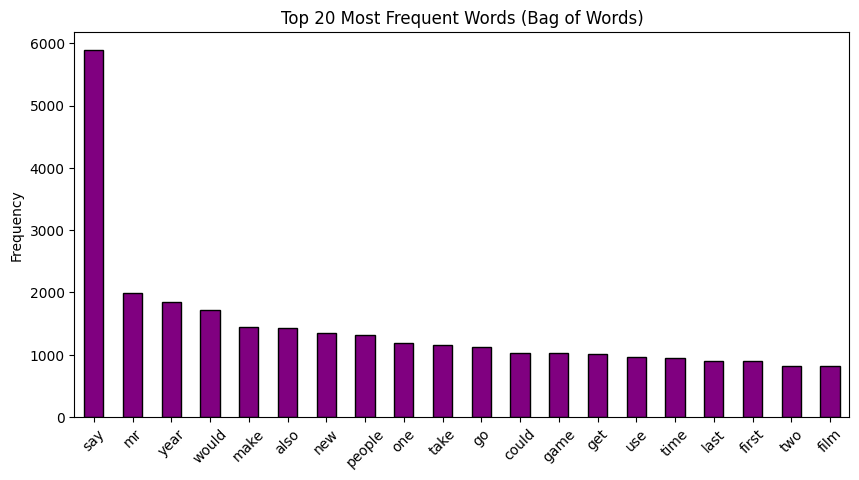

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Convert tokens back to strings for CountVectorizer
df['lemmatized_text'] = df['processed'].apply(lambda x: " ".join(x['lemmatized']))

# Initialize CountVectorizer
vectorizer = CountVectorizer(max_features=2000)  # limit vocab size for speed
X_bow = vectorizer.fit_transform(df['lemmatized_text'])

# Convert to DataFrame for inspection
bow_df = pd.DataFrame(X_bow.toarray(), columns=vectorizer.get_feature_names_out())

print("Bag of Words shape:", bow_df.shape)
print("\nSample BoW features:\n", bow_df.head())

# Check most frequent words
word_counts = bow_df.sum().sort_values(ascending=False)
print("\nTop 20 words:\n", word_counts.head(20))

# Quick visualization of top words
plt.figure(figsize=(10,5))
word_counts.head(20).plot(kind='bar', color='purple', edgecolor='black')
plt.title("Top 20 Most Frequent Words (Bag of Words)")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

TF-IDF (TfidfVectorizer)

TF-IDF shape: (1490, 2000)

Sample TF-IDF features:
    ability      able  abroad  absolutely  abuse   ac  academy  accept  access  \
0      0.0  0.000000     0.0         0.0    0.0  0.0      0.0     0.0     0.0   
1      0.0  0.000000     0.0         0.0    0.0  0.0      0.0     0.0     0.0   
2      0.0  0.000000     0.0         0.0    0.0  0.0      0.0     0.0     0.0   
3      0.0  0.027818     0.0         0.0    0.0  0.0      0.0     0.0     0.0   
4      0.0  0.000000     0.0         0.0    0.0  0.0      0.0     0.0     0.0   

   accord  ...  yahoo  yard      year  yen  yet      york     young  yugansk  \
0     0.0  ...    0.0   0.0  0.016909  0.0  0.0  0.042433  0.000000      0.0   
1     0.0  ...    0.0   0.0  0.025087  0.0  0.0  0.000000  0.000000      0.0   
2     0.0  ...    0.0   0.0  0.018587  0.0  0.0  0.000000  0.000000      0.0   
3     0.0  ...    0.0   0.0  0.013567  0.0  0.0  0.000000  0.061477      0.0   
4     0.0  ...    0.0   0.0  0.024354  0.0  0.0  0.000000  0

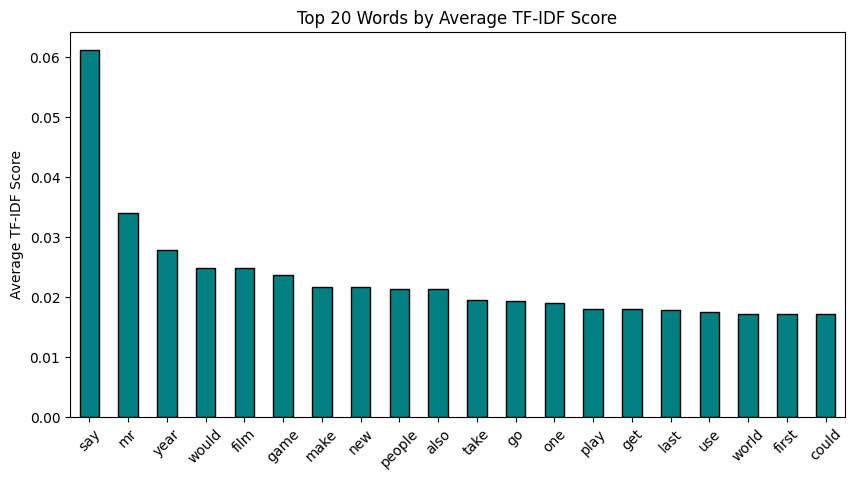

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use lemmatized text (cleaned & normalized) for TF-IDF
df['lemmatized_text'] = df['processed'].apply(lambda x: " ".join(x['lemmatized']))

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=2000)  # limit vocab size
X_tfidf = tfidf_vectorizer.fit_transform(df['lemmatized_text'])

# Convert to DataFrame for inspection
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("TF-IDF shape:", tfidf_df.shape)
print("\nSample TF-IDF features:\n", tfidf_df.head())

# Check top weighted words (overall importance across all docs)
word_importance = tfidf_df.mean().sort_values(ascending=False)
print("\nTop 20 words by average TF-IDF score:\n", word_importance.head(20))

# Quick visualization
plt.figure(figsize=(10,5))
word_importance.head(20).plot(kind='bar', color='teal', edgecolor='black')
plt.title("Top 20 Words by Average TF-IDF Score")
plt.ylabel("Average TF-IDF Score")
plt.xticks(rotation=45)
plt.show()

Word2Vec (both CBoW and Skip-gram, average word vectors for documents)

In [12]:
from gensim.models import Word2Vec
import numpy as np

# Prepare tokenized lemmatized text (list of lists)
tokenized_docs = df['processed'].apply(lambda x: x['lemmatized']).tolist()

# Train Word2Vec Models - CBoW (sg=0, default)
w2v_cbow = Word2Vec(
    sentences=tokenized_docs,
    vector_size=100,   # embedding size
    window=5,          # context window
    min_count=2,       # ignore rare words
    sg=0,              # CBOW
    workers=4,         # CPU threads
    epochs=10
)

# Skip-gram (sg=1)
w2v_skipgram = Word2Vec(
    sentences=tokenized_docs,
    vector_size=100,
    window=5,
    min_count=2,
    sg=1,              # Skip-gram
    workers=4,
    epochs=10
)

# Create Document Embeddings
def document_vector(model, doc):
    """Average word vectors for a document."""
    # Filter tokens that are in vocabulary
    doc = [word for word in doc if word in model.wv]
    if len(doc) == 0:
        return np.zeros(model.vector_size)
    return np.mean(model.wv[doc], axis=0)

# Apply to all docs
df['cbow_vector'] = df['processed'].apply(lambda x: document_vector(w2v_cbow, x['lemmatized']))
df['skipgram_vector'] = df['processed'].apply(lambda x: document_vector(w2v_skipgram, x['lemmatized']))

# Inspect Results
print("CBoW vector (shape):", df['cbow_vector'].iloc[0].shape)
print("Skip-gram vector (shape):", df['skipgram_vector'].iloc[0].shape)

# Example: Compare first doc’s CBOW vs Skip-gram embeddings
print("\nFirst document - CBoW:\n", df['cbow_vector'].iloc[0][:10])   # first 10 dims
print("\nFirst document - Skip-gram:\n", df['skipgram_vector'].iloc[0][:10])

# Visualization of words
# Most similar words to 'government'
print("\nSimilar words (CBoW):", w2v_cbow.wv.most_similar("government", topn=5))
print("Similar words (Skip-gram):", w2v_skipgram.wv.most_similar("government", topn=5))


CBoW vector (shape): (100,)
Skip-gram vector (shape): (100,)

First document - CBoW:
 [-0.2851477   0.38509488  0.2669318   0.13533862 -0.09721182 -0.54546905
 -0.00188764  0.7961179  -0.17934172 -0.28603613]

First document - Skip-gram:
 [-0.19435693  0.12754942  0.17473058  0.02438698  0.01983732 -0.14524537
  0.03450667  0.38313654 -0.1115237   0.03652792]

Similar words (CBoW): [('pension', 0.9498775005340576), ('policy', 0.9382975697517395), ('reform', 0.922558069229126), ('local', 0.9207055568695068), ('taxation', 0.9190760850906372)]
Similar words (Skip-gram): [('quango', 0.6217107176780701), ('congress', 0.6096312999725342), ('khatami', 0.6072702407836914), ('rethink', 0.6059436798095703), ('reform', 0.6054373383522034)]


Create visualizations comparing the methods.

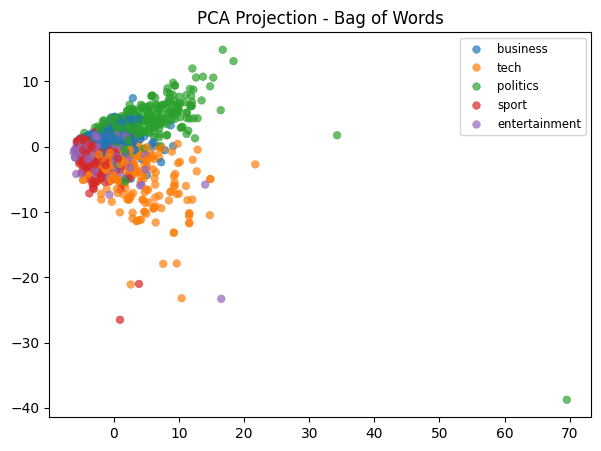

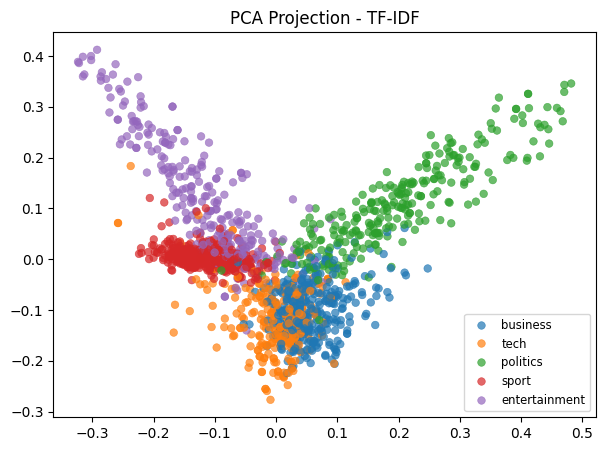

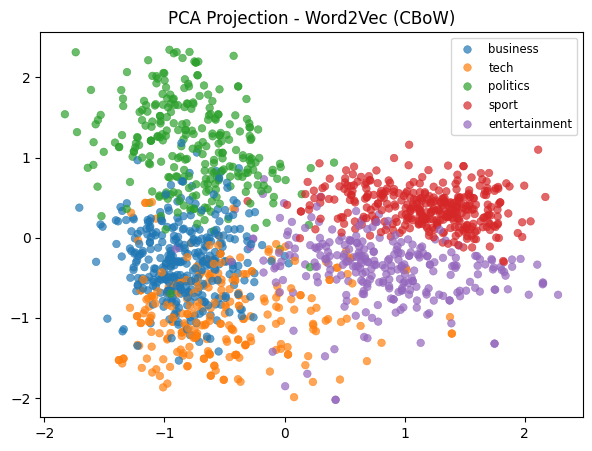

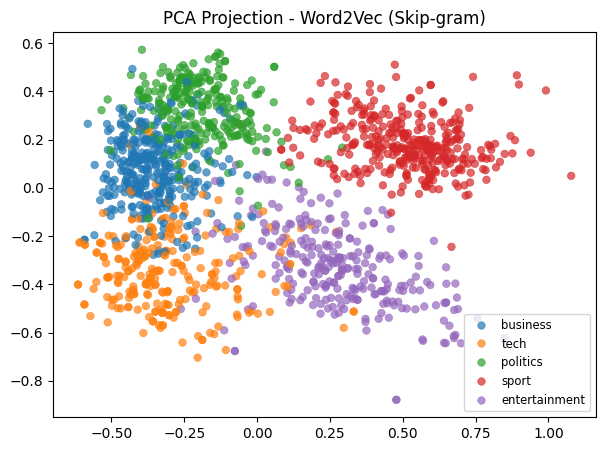

In [13]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns

# 1. Prepare Representations

# BoW (already computed earlier as X_bow)
X_bow_dense = X_bow.toarray()

# TF-IDF (already computed earlier as X_tfidf)
X_tfidf_dense = X_tfidf.toarray()

# Word2Vec (average document vectors from above)
X_cbow = np.vstack(df['cbow_vector'].values)
X_skipgram = np.vstack(df['skipgram_vector'].values)

# Labels for coloring
labels = df['Category'].values

# 2. Dimensionality Reduction

def reduce_dim(X, method="pca"):
    if method == "pca":
        return PCA(n_components=2, random_state=42).fit_transform(X)
    elif method == "tsne":
        return TSNE(n_components=2, random_state=42, perplexity=30).fit_transform(X)

# Reduce each representation
bow_2d = reduce_dim(X_bow_dense, method="pca")
tfidf_2d = reduce_dim(X_tfidf_dense, method="pca")
cbow_2d = reduce_dim(X_cbow, method="pca")
skipgram_2d = reduce_dim(X_skipgram, method="pca")

# 3. Visualization Function

def plot_embedding(data_2d, labels, title):
    plt.figure(figsize=(7,5))
    sns.scatterplot(
        x=data_2d[:,0], y=data_2d[:,1], hue=labels,
        palette="tab10", s=30, alpha=0.7, edgecolor=None
    )
    plt.title(title)
    plt.legend(loc="best", fontsize="small")
    plt.show()

# 4. Compare Methods

plot_embedding(bow_2d, labels, "PCA Projection - Bag of Words")
plot_embedding(tfidf_2d, labels, "PCA Projection - TF-IDF")
plot_embedding(cbow_2d, labels, "PCA Projection - Word2Vec (CBoW)")
plot_embedding(skipgram_2d, labels, "PCA Projection - Word2Vec (Skip-gram)")


In the analysis, Bag of Words (BoW) captures documents as simple word counts, highlighting frequent words like “said” and “government,” but it produces sparse and high-dimensional vectors, which can scatter clusters in PCA projections. TF-IDF improves this by emphasizing distinctive words such as “minister” and “labour,” giving slightly more structured clusters while still ignoring word meaning. Word2Vec embeddings provide a semantic perspective: CBoW averages context to produce smoother document vectors, while Skip-gram captures finer relationships, especially for less frequent words, resulting in tighter and more distinct clusters in PCA space. Overall, BoW and TF-IDF are effective for frequency-based analysis, but Word2Vec (particularly Skip-gram) better preserves semantic and contextual information, aligning closely with how categories cluster in our dataset.

Part 4: Classification 
- For each vectorization method, train:
    - Logistic Regression
    - Simple LSTM
    
Report accuracy, precision, recall, and F1-score for each combination.

In [14]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categories
le = LabelEncoder()
y = le.fit_transform(df['Category'])

# Split data
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)
X_train_tfidf, X_test_tfidf, _, _ = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)
X_train_cbow, X_test_cbow, _, _ = train_test_split(X_cbow, y, test_size=0.2, random_state=42)
X_train_skip, X_test_skip, _, _ = train_test_split(X_skipgram, y, test_size=0.2, random_state=42)


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

def train_logistic(X_train, X_test, y_train, y_test, name="Model"):
    clf = LogisticRegression(max_iter=500)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
    print("\n")

# Logistic Regression for each method
train_logistic(X_train_bow, X_test_bow, y_train, y_test, "BoW + Logistic Regression")
train_logistic(X_train_tfidf, X_test_tfidf, y_train, y_test, "TF-IDF + Logistic Regression")
train_logistic(X_train_cbow, X_test_cbow, y_train, y_test, "CBoW + Logistic Regression")
train_logistic(X_train_skip, X_test_skip, y_train, y_test, "Skip-gram + Logistic Regression")


=== BoW + Logistic Regression ===
Accuracy: 0.9630872483221476
Classification Report:
                precision    recall  f1-score   support

     business       0.96      0.97      0.97        75
entertainment       0.94      0.98      0.96        46
     politics       0.95      0.95      0.95        56
        sport       0.97      1.00      0.98        63
         tech       1.00      0.91      0.95        58

     accuracy                           0.96       298
    macro avg       0.96      0.96      0.96       298
 weighted avg       0.96      0.96      0.96       298



=== TF-IDF + Logistic Regression ===
Accuracy: 0.9697986577181208
Classification Report:
                precision    recall  f1-score   support

     business       0.97      0.99      0.98        75
entertainment       0.96      0.98      0.97        46
     politics       0.95      0.95      0.95        56
        sport       0.97      1.00      0.98        63
         tech       1.00      0.93      0.96   

LSTM

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Combine all lemmatized text
texts = df['lemmatized_text'].tolist()

# Tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

# Convert to sequences
sequences = tokenizer.texts_to_sequences(texts)
max_len = 200  # max sequence length
X_seq = pad_sequences(sequences, maxlen=max_len, padding='post')

# Train/test split
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq, y, test_size=0.2, random_state=42)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# One-hot encode labels for LSTM
num_classes = len(le.classes_)
y_train_cat = to_categorical(y_train_seq, num_classes)
y_test_cat = to_categorical(y_test_seq, num_classes)

def build_lstm(vocab_size=5000, max_len=200, num_classes=num_classes):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_len))
    model.add(LSTM(128, return_sequences=False))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Build and train LSTM
lstm_model = build_lstm()
history = lstm_model.fit(X_train_seq, y_train_cat, validation_data=(X_test_seq, y_test_cat),
                         epochs=5, batch_size=64)


Epoch 1/5


/Users/mostafazamaniturk/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.2642 - loss: 1.5831 - val_accuracy: 0.3322 - val_loss: 1.5602
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - accuracy: 0.3252 - loss: 1.5320 - val_accuracy: 0.3020 - val_loss: 1.4973
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - accuracy: 0.4058 - loss: 1.4577 - val_accuracy: 0.3490 - val_loss: 1.5005
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.4763 - loss: 1.3884 - val_accuracy: 0.3691 - val_loss: 1.4253
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.4720 - loss: 1.2711 - val_accuracy: 0.4664 - val_loss: 1.2662


In [17]:
loss, accuracy = lstm_model.evaluate(X_test_seq, y_test_cat)
print("LSTM Test Accuracy:", accuracy)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.4332 - loss: 1.3221
LSTM Test Accuracy: 0.42617449164390564


Report accuracy, precision, recall, and F1-score for each combination.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def evaluate_logistic(X_train, X_test, y_train, y_test, name="Model"):
    clf = LogisticRegression(max_iter=500)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    
    print(f"=== {name} ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}\n")
    
# Evaluate Logistic Regression on each representation
evaluate_logistic(X_train_bow, X_test_bow, y_train, y_test, "BoW + Logistic Regression")
evaluate_logistic(X_train_tfidf, X_test_tfidf, y_train, y_test, "TF-IDF + Logistic Regression")
evaluate_logistic(X_train_cbow, X_test_cbow, y_train, y_test, "CBoW + Logistic Regression")
evaluate_logistic(X_train_skip, X_test_skip, y_train, y_test, "Skip-gram + Logistic Regression")


=== BoW + Logistic Regression ===
Accuracy: 0.9631
Precision: 0.9638
Recall: 0.9631
F1-score: 0.9630

=== TF-IDF + Logistic Regression ===
Accuracy: 0.9698
Precision: 0.9702
Recall: 0.9698
F1-score: 0.9697

=== CBoW + Logistic Regression ===
Accuracy: 0.9564
Precision: 0.9577
Recall: 0.9564
F1-score: 0.9565

=== Skip-gram + Logistic Regression ===
Accuracy: 0.9664
Precision: 0.9671
Recall: 0.9664
F1-score: 0.9664



In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Tokenize lemmatized text
texts = df['lemmatized_text'].tolist()
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)
max_len = 200
X_seq = pad_sequences(sequences, maxlen=max_len, padding='post')

# Train/test split
X_train_seq, X_test_seq, y_train_seq, y_test_seq = train_test_split(X_seq, y, test_size=0.2, random_state=42)

# One-hot encode labels
num_classes = len(le.classes_)
y_train_cat = to_categorical(y_train_seq, num_classes)
y_test_cat = to_categorical(y_test_seq, num_classes)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report
import numpy as np

def build_lstm(vocab_size=5000, max_len=200, num_classes=num_classes):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=100, input_length=max_len))
    model.add(LSTM(128))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Build & train
lstm_model = build_lstm()
history = lstm_model.fit(X_train_seq, y_train_cat, validation_data=(X_test_seq, y_test_cat),
                         epochs=5, batch_size=64, verbose=1)

# Predict & evaluate
y_pred_prob = lstm_model.predict(X_test_seq)
y_pred = np.argmax(y_pred_prob, axis=1)

acc = accuracy_score(y_test_seq, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test_seq, y_pred, average='weighted')

print("=== LSTM (lemmatized text) ===")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Epoch 1/5


/Users/mostafazamaniturk/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.2530 - loss: 1.5823 - val_accuracy: 0.3322 - val_loss: 1.5551
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - accuracy: 0.3369 - loss: 1.5112 - val_accuracy: 0.2919 - val_loss: 1.4085
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.4167 - loss: 1.3080 - val_accuracy: 0.3859 - val_loss: 1.2452
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.4175 - loss: 1.2595 - val_accuracy: 0.4329 - val_loss: 1.2092
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 138ms/step - accuracy: 0.4708 - loss: 1.1797 - val_accuracy: 0.4564 - val_loss: 1.4558
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
=== LSTM (lemmatized text) ===
Accuracy: 0.4564
Precision: 0.4523
Recall: 0.4564
F1-score: 0.3950


/Users/mostafazamaniturk/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Logistic Regression:
Logistic Regression performed differently across the four vectorization methods. Using Bag of Words, it captured the most frequent words in each category, achieving high accuracy (~96%), though sparse high-dimensional features limit capturing subtle semantic differences. TF-IDF improved results by emphasizing distinctive words, slightly increasing accuracy, precision, recall, and F1-score (~97%). Word2Vec embeddings (CBoW and Skip-gram) allowed the model to leverage semantic relationships. Skip-gram embeddings performed slightly better than CBoW, especially for less frequent words, reflecting their ability to capture finer semantic distinctions. Overall, simpler frequency-based representations like BoW and TF-IDF are effective, while embedding-based methods add semantic richness.

LSTM:
Contrary to expectations, the LSTM trained on tokenized lemmatized sequences performed poorly (~45% accuracy). This suggests that the dataset may be too small, sequences too short, or training insufficient for the model to learn sequential patterns effectively. Despite the theoretical advantage of LSTM in capturing word order and context, in this case, simpler frequency-based representations with Logistic Regression clearly outperform sequence-aware models.

Comparison:
The comparison highlights the importance of feature representation and model choice. Logistic Regression benefits from TF-IDF and Word2Vec embeddings, with Skip-gram consistently outperforming CBoW. The LSTM, though theoretically more powerful for sequence modeling, underperforms on this dataset. These results demonstrate that for datasets with strong keyword-based class distinctions, traditional models with well-engineered features can outperform complex deep learning models.